# rayoptics model of prototype

I'm going to calculate some optical properties using the rayoptics module.

In [1]:
from rayoptics.environment import *

# Create lens models

We start by defining some optical systems. For later convenience, we define each through a function which returns the model for a given distance between the lens and the image plane.


## Biconvex lens

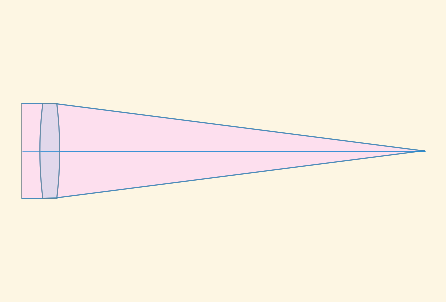

In [2]:
def biconvex_lens_system(image_distance):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0.])
    osp.spectral_region = WvlSpec([(587.5618, 1.0)], ref_wl=0)
    opm.radius_mode = True
    lens_thickness = 2.6
    lens_R = 51.1

    sm.gaps[0].thi=1e10
    sm.add_surface([lens_R, lens_thickness, 'N-BK7', 'Schott'])
    sm.set_stop()
    sm.add_surface([-lens_R, image_distance])
    opm.update_model()
    return opm

model = biconvex_lens_system(48.0);
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, do_paraxial_layout=False).plot()

## Singlet lens

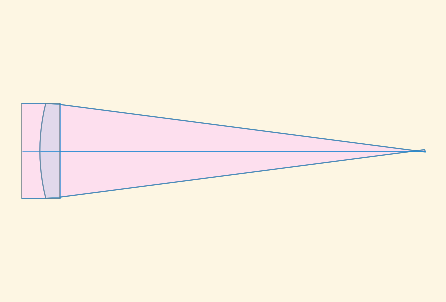

In [8]:
def singlet_lens_system(image_distance):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0.])
    osp.spectral_region = WvlSpec([(587.5618, 1.0)], ref_wl=0)
    opm.radius_mode = True
    lens_thickness = 2.6
    lens_R = 51.1/2
    sm.gaps[0].thi=1e10
    sm.add_surface([lens_R, lens_thickness, 'N-BK7', 'Schott'])
    sm.set_stop()
    sm.add_surface([1e10, image_distance])
    opm.update_model()
    return opm

model = singlet_lens_system(48.0);
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, do_paraxial_layout=False).plot()

#layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm, do_draw_rays=True, offset_factor=lens_separation, do_draw_frame=True).plot()
#layout_plt.set_size_inches(10,2)
#abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same).plot()
#abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same).plot()

## Doublet lens

Specifically the AC127-050-A
https://www.thorlabs.com/thorproduct.cfm?partnumber=AC127-050-A

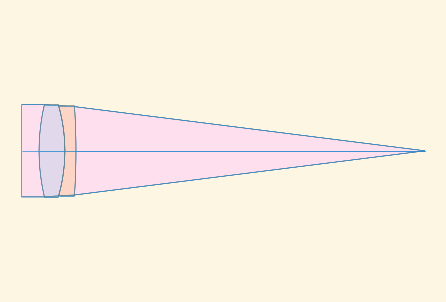

In [4]:
def doublet_lens_system(image_distance):
    opm = OpticalModel()
    sm  = opm.seq_model
    osp = opm.optical_spec
    pm = opm.parax_model

    osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=12.5)
    osp.field_of_view = FieldSpec(osp, key=['object', 'height'], flds=[0])
    osp.spectral_region = WvlSpec([(587.5618, 1.0)], ref_wl=0)

    opm.radius_mode = True

    sm.gaps[0].thi= 1e10
    sm.add_surface([27.4, 3.5, 'N-BK7', 'Schott'])
    sm.set_stop()
    sm.add_surface([-22.5, 1.5, 'SF2', 'Schott'])
    sm.add_surface([-91.8, image_distance])
    opm.update_model()
    return opm

model = doublet_lens_system(50.0-2.7);
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, do_paraxial_layout=False).plot()

#layout_plt = plt.figure(FigureClass=LensLayoutFigure, opt_model=opm, do_draw_rays=True, offset_factor=lens_separation, do_draw_frame=True).plot()
#layout_plt.set_size_inches(10,2)
#layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False).plot()
#abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', scale_type=Fit.All_Same).plot()
#opd_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='OPD', scale_type=Fit.All_Same).plot()

#spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm).plot()

# Finding the focal distance

Now that we have defined each model, let's find the focal distance.

In [5]:
model = singlet_lens_system(10);
f_singlet = model.optical_spec.parax_data.fod.bfl

model = biconvex_lens_system(10);
#model.parax_model.first_order_data()
f_biconvex = model.optical_spec.parax_data.fod.bfl

model = doublet_lens_system(10);
#model.parax_model.first_order_data()
f_doublet = model.optical_spec.parax_data.fod.bfl

# Compare transverse abberations

Plot the transverse abberations at the focal point of each system.

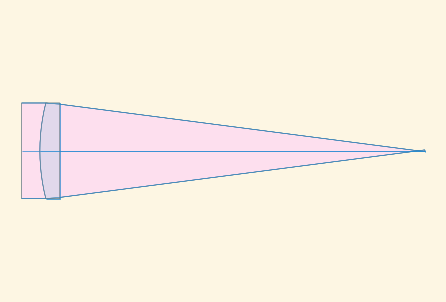

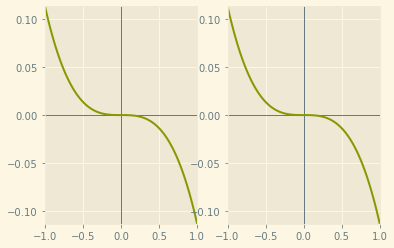

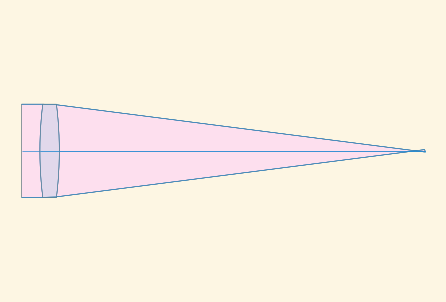

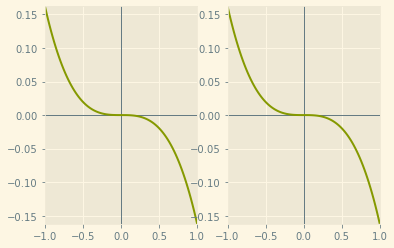

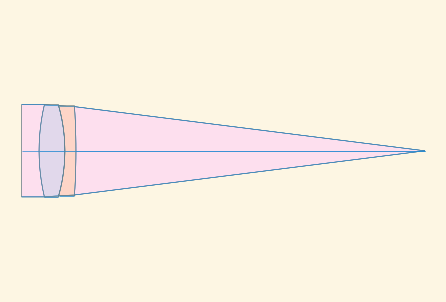

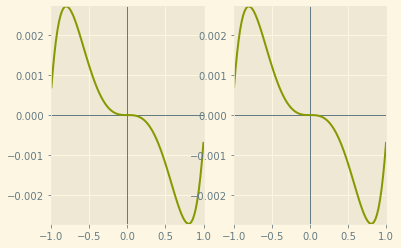

In [15]:
model = singlet_lens_system(f_singlet);
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, do_paraxial_layout=False).plot()
p_singlet = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray', scale_type=Fit.All_Same).plot()

model = biconvex_lens_system(f_biconvex);
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, do_paraxial_layout=False).plot()
p_biconvex = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray', scale_type=Fit.All_Same).plot()

model = doublet_lens_system(f_doublet);
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=model, do_draw_rays=True, do_paraxial_layout=False).plot()
p_doublet = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='Ray', scale_type=Fit.All_Same).plot()

# Plot the wavefront abberation

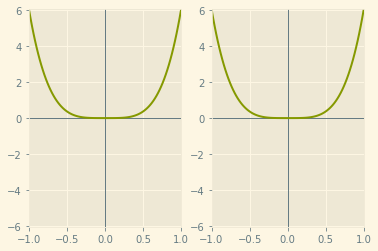

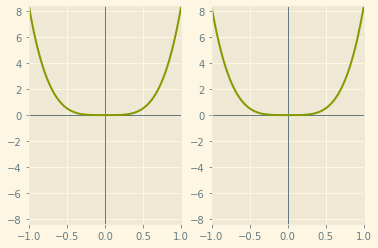

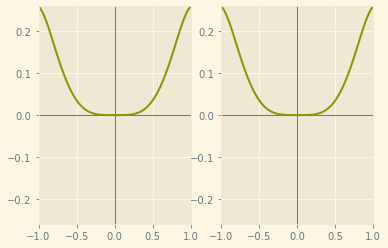

In [7]:
model = singlet_lens_system(f_singlet);
p_singlet = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='OPD', scale_type=Fit.All_Same).plot()

model = biconvex_lens_system(f_biconvex);
p_biconvex = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='OPD', scale_type=Fit.All_Same).plot()

model = doublet_lens_system(f_doublet);
p_doublet = plt.figure(FigureClass=RayFanFigure, opt_model=model, data_type='OPD', scale_type=Fit.All_Same).plot()

# Spot Diagram

Compare the spot diagrams for each system.

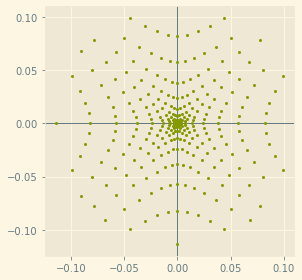

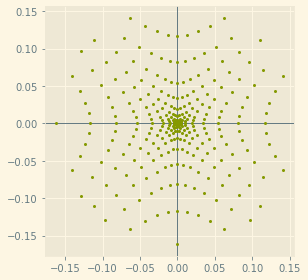

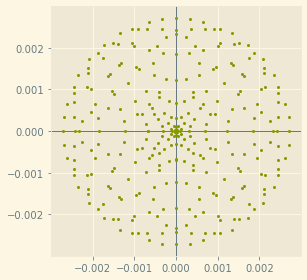

In [10]:
model = singlet_lens_system(f_singlet);
p_singlet = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()

model = biconvex_lens_system(f_biconvex);
p_biconvex = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()

model = doublet_lens_system(f_doublet);
p_doublet = plt.figure(FigureClass=SpotDiagramFigure, opt_model=model).plot()

# First-order data

For a description of properties, see source at
https://github.com/mjhoptics/ray-optics/blob/834fd2cecc06e6a60ef4df9d28a0c23fdaa1435d/src/rayoptics/optical/firstorder.py

In [12]:
model = singlet_lens_system(10);
f_singlet = model.optical_spec.parax_data.fod.bfl
model.parax_model.first_order_data()

efl               49.44
ffl              -49.44
pp1           -4.38e-09
bfl               47.72
ppk               1.714
f/#               3.955
m                0.7631
red          -2.023e+08
obj_dist          1e+10
obj_ang        5.73e-09
enp_dist             -0
enp_radius         6.25
na obj         6.25e-10
n obj                 1
img_dist             10
img_ht        4.944e-09
exp_dist         -1.714
exp_radius         6.25
na img          -0.1254
n img                 1
optical invariant     6.25e-10
